In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from datetime import datetime, timedelta
import math
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/k_/ksvdlm8j31xfmslmhkz4xcj00000gq/T/ipykernel_77550/492434951.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
tr_df = pd.read_csv('data/rents.csv', on_bad_lines='skip', sep=';', decimal=",")
print(tr_df.shape)
tr_df.head()

/Users/uditg/anaconda3/envs/ocean/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(5475131, 22)


,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Master Project,Project
0,120210425000238,25/04/2021 09:36:31,13/04/2021 00:00:00,12/04/2026 00:00:00,1058329686,New,Dubai Investment Park Second,25000.000,5000.000,Free Hold,7488.950,Building,Factory,NaN,Industrial,NaN,NaN,Expo 2020 Site,NaN,1,NaN,NaN
1,120210526001582,26/05/2021 12:12:22,01/06/2021 00:00:00,30/11/2025 00:00:00,99539298,New,Um Nahad Third,16000000.000,4000000.000,Free Hold,6792.000,Building,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
2,120210526001913,26/05/2021 12:47:49,15/06/2021 00:00:00,14/12/2025 00:00:00,99539289,New,Um Nahad Third,16000000.000,4000000.000,Free Hold,6481.940,Building,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
3,120210526002150,26/05/2021 13:14:55,01/07/2021 00:00:00,31/12/2025 00:00:00,99539307,New,Um Nahad Third,16000000.000,4000000.000,Free Hold,6792.000,Building,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
4,120210526002235,26/05/2021 13:27:36,15/07/2021 00:00:00,14/01/2026 00:00:00,99539316,New,Um Nahad Third,16000000.000,4000000.000,Free Hold,6481.940,Building,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN


In [3]:
#Fill missing values
for c in tr_df.columns:
    #print(tr_df[c].dtype)
    if tr_df[c].dtype == 'object':
        tr_df[c].fillna('None', inplace=True)
    else:
        tr_df[c].fillna(0, inplace=True)

## Dates

In [4]:
tr_df.loc[:, 'Transaction Date'] = tr_df['Registration Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M:%S"))

In [5]:
tr_df.loc[:, 'Transaction Year'] = tr_df['Transaction Date'].apply(lambda x: x.year)

In [6]:
tr_df.loc[:, 'Rent Duration (days)'] = tr_df.apply(lambda x: (datetime.strptime(x['End Date'], "%d/%m/%Y %H:%M:%S") - \
                                                      datetime.strptime(x['Start Date'], "%d/%m/%Y %H:%M:%S")).days, axis=1)

## EDA

In [7]:
tr_df = tr_df.loc[lambda x: x['Transaction Year'] >= 2007]
tr_df = tr_df.loc[lambda x: x['Property Size (sq.m)']>0].copy()

In [8]:
tr_df.loc[:, 'Amount_per_sqm'] = tr_df['Annual Amount']/tr_df['Property Size (sq.m)']

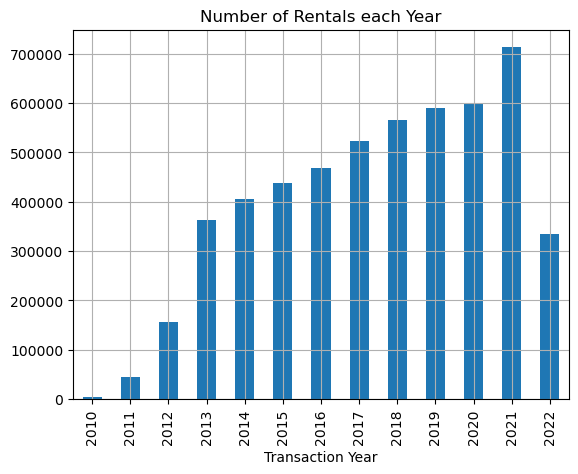

In [29]:
tr_df.groupby('Transaction Year')['Ejari Contract Number'].count().plot.bar()
plt.title('Number of Rentals each Year')
plt.grid()

Text(0, 0.5, 'Num Days')

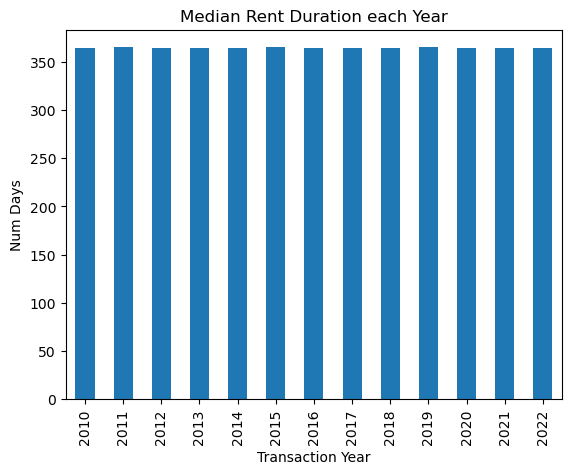

In [30]:
tr_df.groupby('Transaction Year').agg({'Rent Duration (days)': 'median'}).plot.bar(legend=None)
plt.title('Median Rent Duration each Year')
plt.ylabel('Num Days')

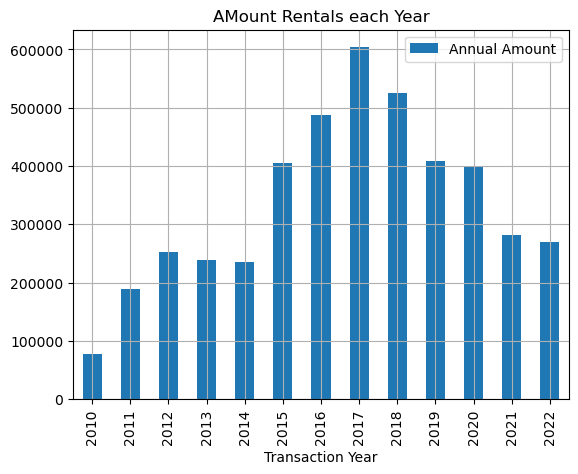

In [57]:
tr_df.groupby('Transaction Year').agg({'Annual Amount': 'mean'}).plot.bar()
plt.title('AMount Rentals each Year')
plt.grid()

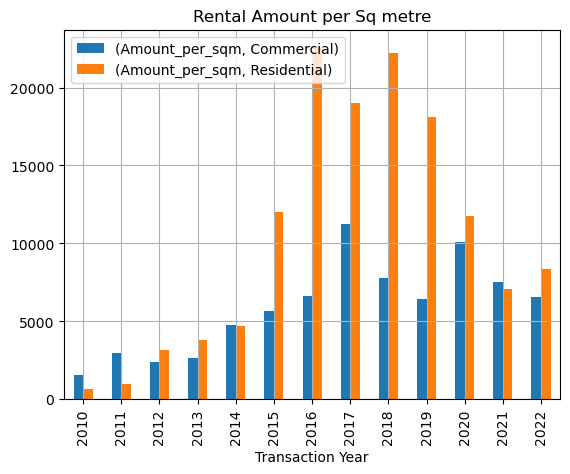

In [9]:
tr_df_temp = tr_df.loc[lambda x: x['Usage'].isin(['Commercial', 'Residential'])]
tr_df_temp.groupby(['Transaction Year', 'Usage']).agg({'Amount_per_sqm': np.mean}).unstack().plot(kind='bar', legend=None)
plt.legend()
plt.title('Rental Amount per Sq metre')
plt.grid()
#plt.xticks(rotation=0);

In [21]:
#tr_df.loc[lambda x: (x['Transaction Year']==2016) & (x['Usage']=='Commercial')].sort_values(by='Amount_per_sqm').tail()

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Master Project,Project,Transaction Date,Transaction Year,Rent Duration (days),Amount_per_sqm
2864792,220160908002036,08/09/2016 13:40:55,20/08/2016 00:00:00,19/08/2019 00:00:00,395733474,New,Eyal Nasser,4200000003.000,1400000001.000,Non Free Hold,1.000,Unit,Shop,0.000,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0.000,9,None,None,2016-09-08 13:40:55,2016,1094,1400000001.000
2864795,220160908002036,08/09/2016 13:40:55,20/08/2016 00:00:00,19/08/2019 00:00:00,395741583,New,Eyal Nasser,4200000003.000,1400000001.000,Non Free Hold,1.000,Unit,Shop,0.000,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0.000,9,None,None,2016-09-08 13:40:55,2016,1094,1400000001.000
2864791,220160908002036,08/09/2016 13:40:55,20/08/2016 00:00:00,19/08/2019 00:00:00,312085533,New,Eyal Nasser,4200000003.000,1400000001.000,Non Free Hold,1.000,Unit,Shop,0.000,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0.000,9,None,None,2016-09-08 13:40:55,2016,1094,1400000001.000
2864794,220160908002036,08/09/2016 13:40:55,20/08/2016 00:00:00,19/08/2019 00:00:00,395737713,New,Eyal Nasser,4200000003.000,1400000001.000,Non Free Hold,1.000,Unit,Shop,0.000,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0.000,9,None,None,2016-09-08 13:40:55,2016,1094,1400000001.000
2864797,220160908002036,08/09/2016 13:40:55,20/08/2016 00:00:00,19/08/2019 00:00:00,395777088,New,Eyal Nasser,4200000003.000,1400000001.000,Non Free Hold,1.000,Unit,Shop,0.000,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0.000,9,None,None,2016-09-08 13:40:55,2016,1094,1400000001.000


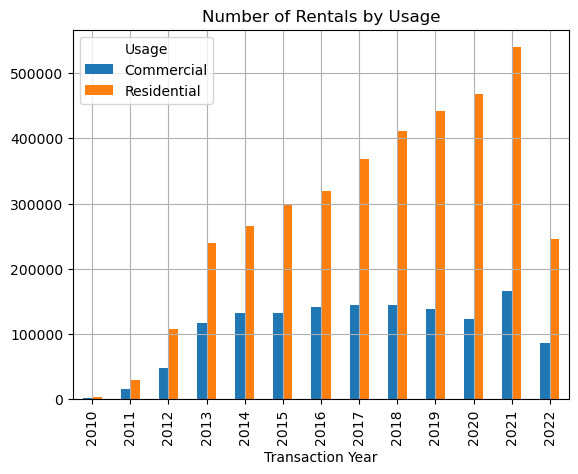

In [65]:
tr_df_temp = tr_df.loc[lambda x: x['Usage'].isin(['Commercial', 'Residential'])]
tr_df_temp.groupby(['Transaction Year', 'Usage'])['Ejari Contract Number'].count().unstack().plot(kind='bar')
plt.title('Number of Rentals by Usage')
plt.grid()

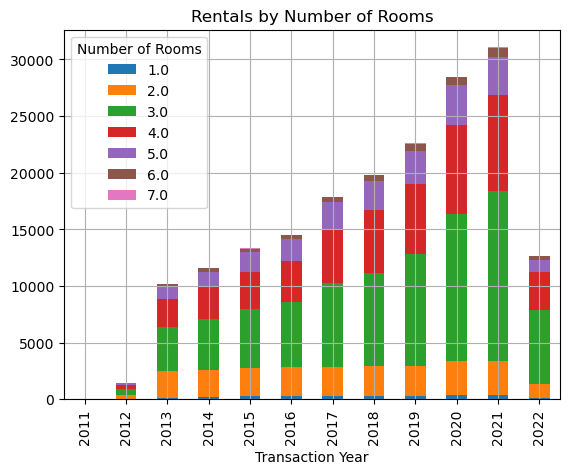

In [19]:
tr_df_temp = tr_df.loc[lambda x: (x['Number of Rooms']>0) & (x['Number of Rooms']<=7)]
tr_df_temp.groupby(['Transaction Year', 'Number of Rooms'])['Ejari Contract Number'].count().unstack().plot.bar(stacked=True)
plt.title('Rentals by Number of Rooms')
plt.grid()

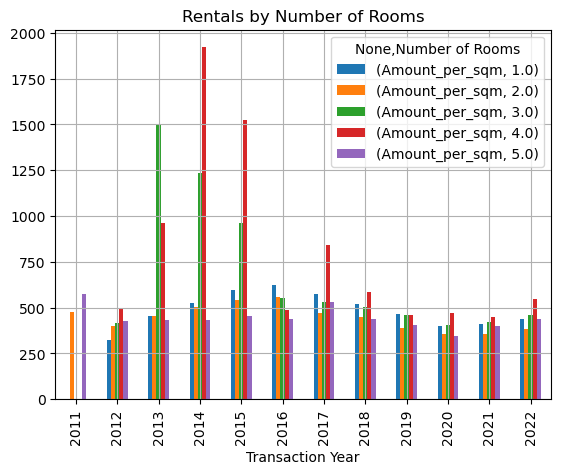

In [25]:
tr_df_temp = tr_df.loc[lambda x: (x['Number of Rooms']>0) & (x['Number of Rooms']<=5)]
tr_df_temp.groupby(['Transaction Year', 'Number of Rooms']).agg({'Amount_per_sqm': 'mean'}).unstack().plot.bar(stacked=False)
plt.title('Rentals by Number of Rooms')
plt.grid()

(0.0, 4000000.0)

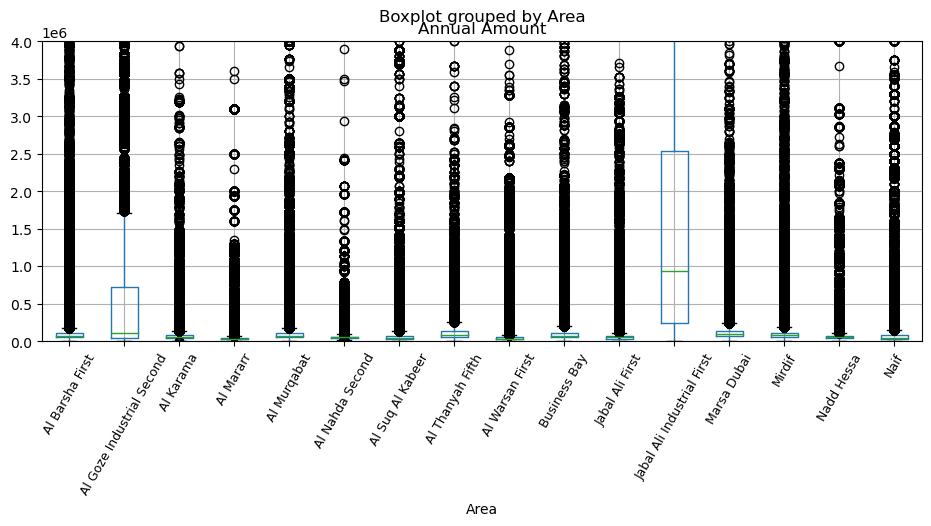

In [54]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Area').filter(lambda x: len(x)>100000)
tr_df_temp.boxplot(by='Area', column='Annual Amount', ax=ax)
plt.xticks(rotation=60, fontsize=9);
plt.ylim(0, 4*(10**6))

(0.0, 2000000.0)

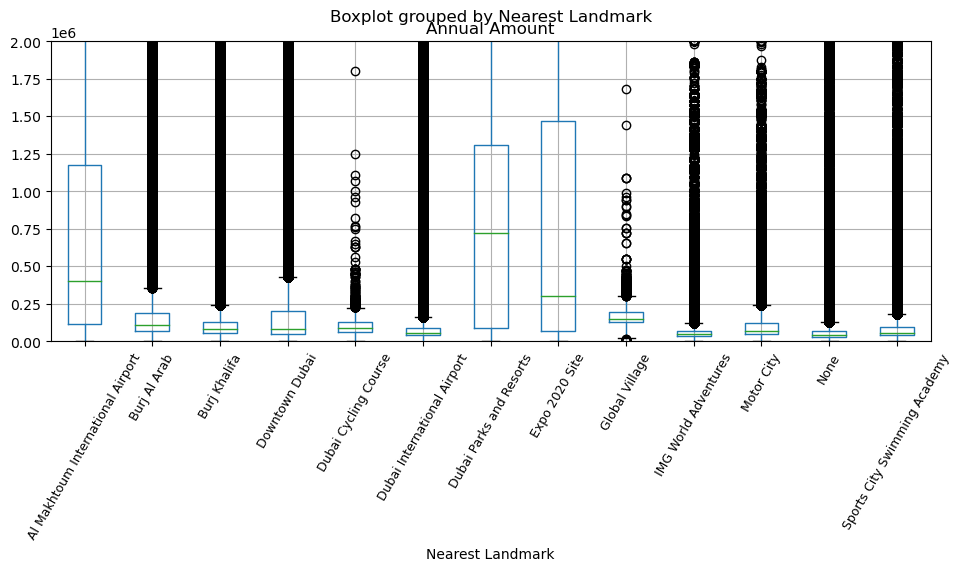

In [32]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Nearest Landmark').filter(lambda x: len(x)>5000)
tr_df_temp.boxplot(by='Nearest Landmark', column='Annual Amount', ax=ax)
plt.xticks(rotation=60, fontsize=9);
plt.ylim(0, 2*(10**6))

(0.0, 2000000.0)

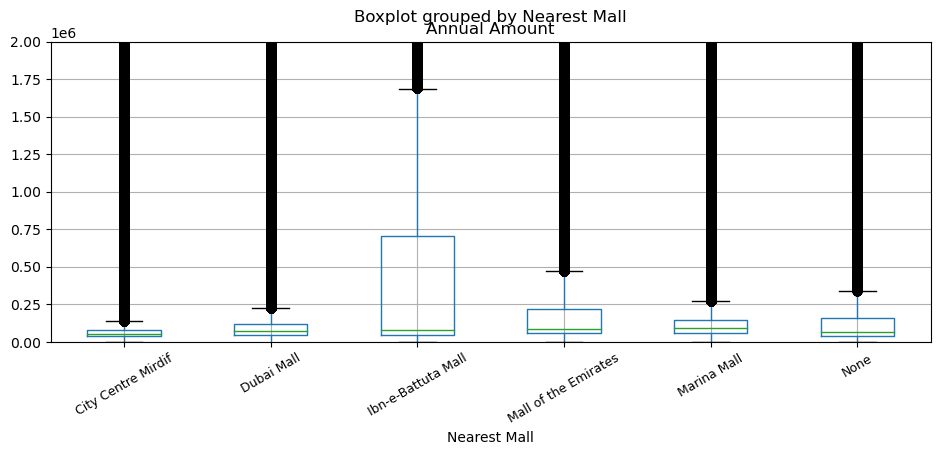

In [38]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Nearest Mall').filter(lambda x: len(x)>5000)
tr_df_temp.boxplot(by='Nearest Mall', column='Annual Amount', ax=ax)
plt.xticks(rotation=30, fontsize=9);
plt.ylim(0, 2*(10**6))

(0.0, 2000000.0)

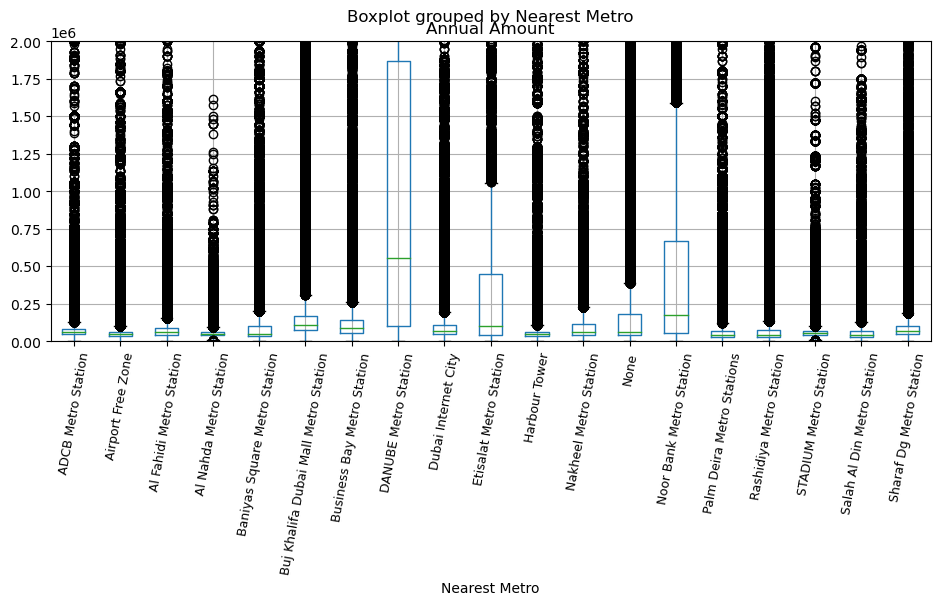

In [37]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Nearest Metro').filter(lambda x: len(x)>100000)
tr_df_temp.boxplot(by='Nearest Metro', column='Annual Amount', ax=ax)
plt.xticks(rotation=80, fontsize=9);
plt.ylim(0, 2*(10**6))

(0.0, 2000000.0)

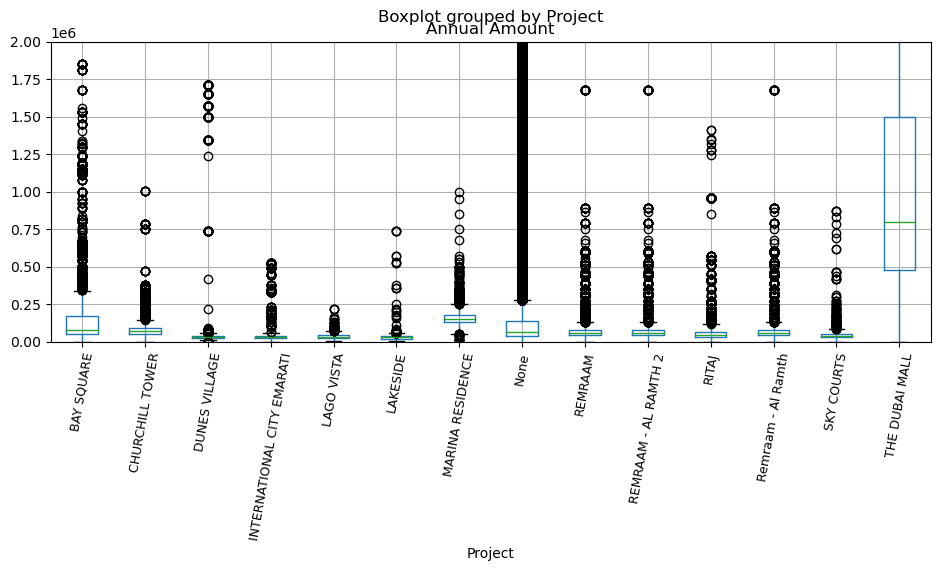

In [43]:
fig, ax = plt.subplots(1,1, figsize=(11, 4))
tr_df_temp = tr_df.groupby('Project').filter(lambda x: len(x)>5000)
tr_df_temp.boxplot(by='Project', column='Annual Amount', ax=ax)
plt.xticks(rotation=80, fontsize=9);
plt.ylim(0, 2*(10**6))